In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
import numpy as np
import os
import random
from shutil import copyfile
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
to_create = [
    '/content/gdrive/My Drive/leaf_disease',
    '/content/gdrive/My Drive/leaf_disease/training',
    '/content/gdrive/My Drive/leaf_disease/testing',
    '/content/gdrive/My Drive/leaf_disease/training/Tomato_Bacterial_spot',
    '/content/gdrive/My Drive/leaf_disease/training/Tomato_Late_blight',
    '/content/gdrive/My Drive/leaf_disease/training/Tomato_Early_blight',
    '/content/gdrive/My Drive/leaf_disease/training/Tomato_Leaf_Mold',
    '/content/gdrive/My Drive/leaf_disease/training/Tomato_healthy',
    '/content/gdrive/My Drive/leaf_disease/training/Tomato_YellowLeaf__Curl_Virus',
    '/content/gdrive/My Drive/leaf_disease/testing/Tomato_Bacterial_spot',
    '/content/gdrive/My Drive/leaf_disease/testing/Tomato_Late_blight',
    '/content/gdrive/My Drive/leaf_disease/testing/Tomato_Early_blight',
    '/content/gdrive/My Drive/leaf_disease/testing/Tomato_Leaf_Mold',
    '/content/gdrive/My Drive/leaf_disease/testing/Tomato_healthy',
    '/content/gdrive/My Drive/leaf_disease/testing/Tomato_YellowLeaf__Curl_Virus'

]
for directory in to_create:
    try:
        os.mkdir(directory)
        print(directory, 'created')
    except:
        print(directory, 'failed')
        

In [0]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    all_files = []
    
    for file_name in os.listdir(SOURCE):
        file_path = SOURCE + file_name

        if os.path.getsize(file_path):
            all_files.append(file_name)
        else:
            print('{} is zero length, so ignoring'.format(file_name))
    
    n_files = len(all_files)
    split_point = int(n_files * SPLIT_SIZE)
    
    shuffled = random.sample(all_files, n_files)
    
    train_set = shuffled[:split_point]
    test_set = shuffled[split_point:]
    
    for file_name in train_set:
        copyfile(SOURCE + file_name, TRAINING + file_name)
        
    for file_name in test_set:
        copyfile(SOURCE + file_name, TESTING + file_name)


In [0]:
#DO THIS FOR ALL THE CLASSES

SOURCE_DIR = r"/content/gdrive/My Drive/Data/Tomato_Late_blight/"
TRAINING_DIR = r"/content/gdrive/My Drive/leaf_disease/training/Tomato_Late_blight/"
TESTING_DIR = r"/content/gdrive/My Drive/leaf_disease/testing/Tomato_Late_blight/"

split_size = .8
split_data(SOURCE_DIR, TRAINING_DIR, TESTING_DIR, split_size)



In [43]:
training_dir= '/content/gdrive/My Drive/leaf_disease/training'
validation_dir=  '/content/gdrive/My Drive/leaf_disease/testing'

train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
     )

train_generator = train_datagen.flow_from_directory(
        training_dir,  
        target_size=(256, 256),  
        batch_size=128,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(256, 256),
        batch_size=128,
        class_mode='categorical')



Found 8627 images belonging to 6 classes.
Found 2160 images belonging to 6 classes.


Uncomment the below section if you want to use callbacks and specify the required accuracy.

In [0]:
#class myCallback(tf.keras.callbacks.Callback):
#  def on_epoch_end(self, epoch, logs={}):
#    if(logs.get('accuracy')>0.98):
#      print("\nReached 98% accuracy so cancelling training!")
#      self.model.stop_training = True

#callbacks= myCallback()
  

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        1

In [0]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
history = model.fit(train_generator,
                    epochs=50,
                    steps_per_epoch=68,
                    validation_data=validation_generator,
                    validation_steps=17,
                    verbose=1)


Epoch 1/50
68/68 [==============================] - 296s 4s/step - loss: 0.8652 - accuracy: 0.7094 - val_loss: 0.5403 - val_accuracy: 0.8056
Epoch 2/50
68/68 [==============================] - 127s 2s/step - loss: 0.5876 - accuracy: 0.7835 - val_loss: 0.5165 - val_accuracy: 0.8157
Epoch 3/50
68/68 [==============================] - 128s 2s/step - loss: 0.5152 - accuracy: 0.8114 - val_loss: 0.6662 - val_accuracy: 0.7722
Epoch 4/50
68/68 [==============================] - 128s 2s/step - loss: 0.4425 - accuracy: 0.8348 - val_loss: 0.4802 - val_accuracy: 0.8361
Epoch 5/50
68/68 [==============================] - 128s 2s/step - loss: 0.3951 - accuracy: 0.8550 - val_loss: 0.4321 - val_accuracy: 0.8537
Epoch 6/50
68/68 [==============================] - 129s 2s/step - loss: 0.3391 - accuracy: 0.8761 - val_loss: 0.4603 - val_accuracy: 0.8394
Epoch 7/50
68/68 [==============================] - 129s 2s/step - loss: 0.3144 - accuracy: 0.8878 - val_loss: 0.3349 - val_accuracy: 0.8745
Epoch 8/50
68

PLOT LOSS AND ACCURACY

Text(0.5, 1.0, 'Training and validation loss')

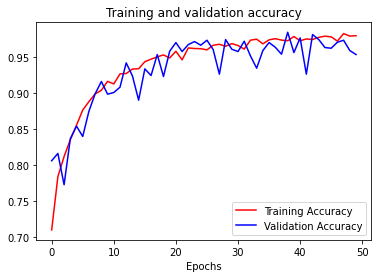

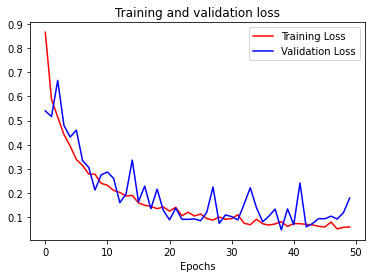

In [0]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) 

plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epochs')
plt.legend()
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.xlabel('Epochs')
plt.legend()
plt.title('Training and validation loss')

SAVE THE MODEL


In [0]:
model.save('/content/gdrive/My Drive/leaf_disease/trained_model.h5')

DETECTION

In [42]:
#GET THE LABEL LIST USING THE ImageDataGenerator FUNCTION FOR TRAINING :  labels = train_generator.class_indices 
labels= ['Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_YellowLeaf__Curl_Virus', 'Tomato_healthy']

model = tf.keras.models.load_model('/content/gdrive/My Drive/leaf_disease/trained_model.h5')
path = '/content/gdrive/My Drive/leaf_disease/test/lb.JPG'
img = image.load_img(path, target_size=(256, 256))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

classes = model.predict_classes(x)
print("It is classified as {}".format(labels[classes[0]]))


It is classified as Tomato_Late_blight
